In [6]:
# Sentiment Analysis

In [7]:
### Import Important Libraries

In [51]:
import pandas as pd
import numpy as np
import pickle
import os
import io
import re
from sys import path
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
import matplotlib.pyplot as plt
from string import punctuation,digits
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize import RegexpTokenizer
import wordcloud
from PIL import Image
from wordcloud import WordCloud,STOPWORDS

In [9]:
# Load the data 

#Amazon Data
inpu_file="amazon_cells_labelled.txt"
amazon=pd.read_csv(inpu_file,sep='\t')
amazon.columns=['Sentence','Class']
amazon.head()

,Sentence,Class
0,"Good case, Excellent value.",1
1,Great for the jawbone.,1
2,Tied to charger for conversations lasting more...,0
3,The mic is great.,1
4,I have to jiggle the plug to get it to line up...,0


In [10]:
#Imdb
inpu_file="imdb_labelled (1).txt"
imdb=pd.read_csv(inpu_file,sep='\t')
imdb.columns=['Sentence','Class']
imdb.head()

,Sentence,Class
0,Not sure who was more lost - the flat characte...,0
1,Attempting artiness with black & white and cle...,0
2,Very little music or anything to speak of.,0
3,The best scene in the movie was when Gerardo i...,1
4,"The rest of the movie lacks art, charm, meanin...",0


In [11]:
#Yelp

inpu_file='yelp_labelled.txt'
yelp=pd.read_csv(inpu_file,sep='\t')
yelp.columns=['Sentence','Class']
yelp.head()

,Sentence,Class
0,Crust is not good.,0
1,Not tasty and the texture was just nasty.,0
2,Stopped by during the late May bank holiday of...,1
3,The selection on the menu was great and so wer...,1
4,Now I am getting angry and I want my damn pho.,0


In [12]:
# Create a new Dataframe using all the three input files
data=pd.DataFrame()
data=pd.concat([amazon,imdb,yelp])
data['index']=data.index
data

,Sentence,Class,index
0,"Good case, Excellent value.",1,0
1,Great for the jawbone.,1,1
2,Tied to charger for conversations lasting more...,0,2
3,The mic is great.,1,3
4,I have to jiggle the plug to get it to line up...,0,4
...,...,...,...
994,I think food should have flavor and texture an...,0,994
995,Appetite instantly gone.,0,995
996,Overall I was not impressed and would not go b...,0,996
997,"The whole experience was underwhelming, and I ...",0,997


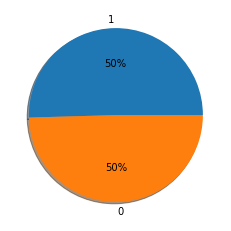

In [13]:
#Checking if the data is well balanced?

plt.pie(data['Class'].value_counts(),autopct='%.0f%%',shadow=True,labels=data['Class'].unique())
plt.show()

In [14]:
## Text Processing Steps

#Lower String
#Remove Email Address
#Remove IP Address
#Remove Punctuation and Special Characters
# Remove Numbers
#Remove Stop words


In [15]:
#Text Preprocessing
columns=["index","Class","Sentence"]
df=pd.DataFrame(columns=columns)


#Lower String
data['Sentence']=[term.lower() for term in data['Sentence']]
data['Sentence']

0                            good case, excellent value.
1                                 great for the jawbone.
2      tied to charger for conversations lasting more...
3                                      the mic is great.
4      i have to jiggle the plug to get it to line up...
                             ...                        
994    i think food should have flavor and texture an...
995                             appetite instantly gone.
996    overall i was not impressed and would not go b...
997    the whole experience was underwhelming, and i ...
998    then, as if i hadn't wasted enough of my life ...
Name: Sentence, Length: 2745, dtype: object

In [16]:
#Remove Email Address
data['Sentence']=data['Sentence'].replace('[a-zA-Z0-9-_.]+@[a-zA-Z0-9-_.]+','',regex=True)
data['Sentence']

0                            good case, excellent value.
1                                 great for the jawbone.
2      tied to charger for conversations lasting more...
3                                      the mic is great.
4      i have to jiggle the plug to get it to line up...
                             ...                        
994    i think food should have flavor and texture an...
995                             appetite instantly gone.
996    overall i was not impressed and would not go b...
997    the whole experience was underwhelming, and i ...
998    then, as if i hadn't wasted enough of my life ...
Name: Sentence, Length: 2745, dtype: object

In [17]:
#Remove IP Address

data['Sentence']=data['Sentence'].replace('((25[0-5]|2[0-4][0-9]|[01][0-9][0-9]?)(\.|$)){4}',"",regex=True)
data['Sentence']

0                            good case, excellent value.
1                                 great for the jawbone.
2      tied to charger for conversations lasting more...
3                                      the mic is great.
4      i have to jiggle the plug to get it to line up...
                             ...                        
994    i think food should have flavor and texture an...
995                             appetite instantly gone.
996    overall i was not impressed and would not go b...
997    the whole experience was underwhelming, and i ...
998    then, as if i hadn't wasted enough of my life ...
Name: Sentence, Length: 2745, dtype: object

In [18]:
#Remove Punctuation and special Characters

data['Sentence']=data['Sentence'].replace('[^\w\s]','',regex=True)
data['Sentence']

0                              good case excellent value
1                                  great for the jawbone
2      tied to charger for conversations lasting more...
3                                       the mic is great
4      i have to jiggle the plug to get it to line up...
                             ...                        
994    i think food should have flavor and texture an...
995                              appetite instantly gone
996    overall i was not impressed and would not go back
997    the whole experience was underwhelming and i t...
998    then as if i hadnt wasted enough of my life th...
Name: Sentence, Length: 2745, dtype: object

In [19]:
#Remove Numbers
data['Sentence']=data['Sentence'].replace('\d','',regex=True)
data['Sentence']

0                              good case excellent value
1                                  great for the jawbone
2      tied to charger for conversations lasting more...
3                                       the mic is great
4      i have to jiggle the plug to get it to line up...
                             ...                        
994    i think food should have flavor and texture an...
995                              appetite instantly gone
996    overall i was not impressed and would not go back
997    the whole experience was underwhelming and i t...
998    then as if i hadnt wasted enough of my life th...
Name: Sentence, Length: 2745, dtype: object

In [20]:
stop_nltk=stopwords.words("English")

In [21]:
#remove stop words


#We can do this way but it would be a lengthy one(tokenize then  remove stop words) so go with the next cell as its a short cut :P

def  del_stop(ind):
    res=[term for term in data['Sentence'] if term not in stop_nltk]
    return res


In [22]:
for index,row in data.iterrows():
    word_tokens=word_tokenize(row['Sentence'])
    filtered_sentence=[w for w in word_tokens if not w in stop_nltk]
    df=df.append({"index":row['index'],"Class":row['Class'],"Sentence":" ".join(filtered_sentence[0:])},ignore_index=True)
data=df

In [23]:
data

,index,Class,Sentence
0,0,1,good case excellent value
1,1,1,great jawbone
2,2,0,tied charger conversations lasting minutesmajo...
3,3,1,mic great
4,4,0,jiggle plug get line right get decent volume
...,...,...,...
2740,994,0,think food flavor texture lacking
2741,995,0,appetite instantly gone
2742,996,0,overall impressed would go back
2743,997,0,whole experience underwhelming think well go n...


In [44]:
#WORDCLOUD

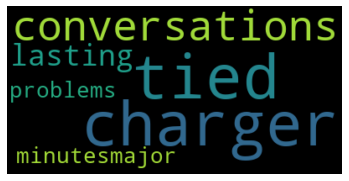

In [40]:
# Word Cloud for only one Review

text=data['Sentence'][2]
wordcloud=WordCloud().generate(text)
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
# Word Cloud for all the Reviews

There are 125910 words in the combination of all review : 


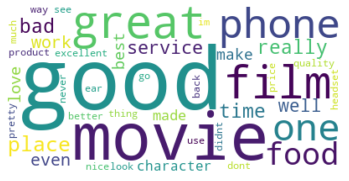

In [48]:
text=" ".join(review for review in data['Sentence'])
print('There are {} words in the combination of all review : '.format(len(text)))


wordcloud=WordCloud(background_color='White',min_font_size=10).generate(text)



plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

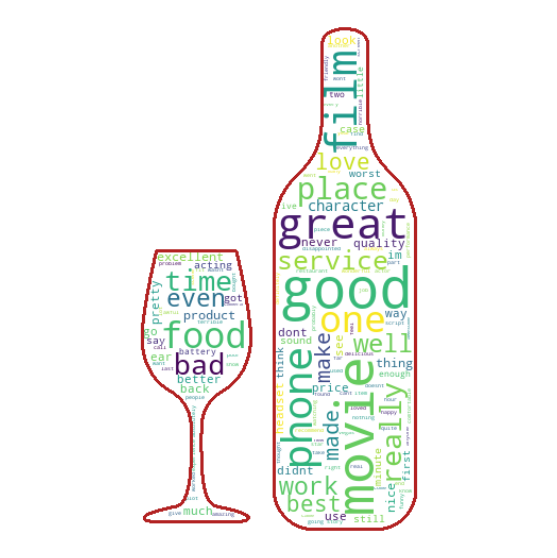

In [69]:
#NOW if we want to change the squaared Word Cloud to A wine bottle word cloud

wine_mask = np.array(Image.open("wine_mask.png"))
wine_mask


def transform_format(val):
    if val == 0:
        return 255
    else:
        return val
    
transformed_wine_mask = np.ndarray((wine_mask.shape[0],wine_mask.shape[1]), np.int32)

for i in range(len(wine_mask)):
    transformed_wine_mask[i] = list(map(transform_format, wine_mask[i]))
    
transformed_wine_mask

# Create a word cloud image
wc = WordCloud(background_color="white", max_words=1000, mask=transformed_wine_mask,
                contour_width=3, contour_color='firebrick')

# Generate a wordcloud
wc.generate(text)

# store to file
wc.to_file("wine1.png")

# show
plt.figure(figsize=[20,10])
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [72]:
# Train Test Split
x_train,x_test,y_train,y_test=train_test_split(data['Sentence'].values.astype('U'),data['Class'].values.astype('int32'),test_size=0.10,random_state=2)
classes=data['Class'].unique()


In [73]:
#Training the model
# Convert the text into a TFIDF Representation
# Train the ML Model


In [156]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import SGDClassifier


#Grid Search Result
vectorizer=TfidfVectorizer(analyzer='word',ngram_range=(1,3),max_features=50000,max_df=0.5,use_idf=True,norm='l1')
#max_df only consider those words whose tf-idf value is greater than 0.5
#use_idf =true is not only tf do idf too


counts=vectorizer.fit_transform(x_train)
vocab=vectorizer.vocabulary_


classifier=SGDClassifier(alpha=1e-05,max_iter=50,penalty='l1')
classifier=classifier.fit(counts,y_train)
example_counts=vectorizer.transform(x_test)


predictions=classifier.predict(example_counts)

In [157]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report


#Model Evaluation
acc=accuracy_score(y_test,predictions,normalize=True)
hit=precision_score(y_test,predictions,average=None,labels=classes)
capture=recall_score(y_test,predictions,average=None,labels=classes)

print('Model Accuracy :%2f'%acc)

print(classification_report(y_test,predictions))

Model Accuracy :0.821818
              precision    recall  f1-score   support

           0       0.84      0.80      0.82       141
           1       0.80      0.84      0.82       134

    accuracy                           0.82       275
   macro avg       0.82      0.82      0.82       275
weighted avg       0.82      0.82      0.82       275



In [118]:
hit


array([0.79577465, 0.84210526])

In [119]:
capture

array([0.84328358, 0.79432624])

In [132]:
# TO see the details of classification report

classification_report?

In [137]:
feature_name=vectorizer.get_feature_names()
feature_name

['aailiyah',
 'aailiyah pretty',
 'aailiyah pretty good',
 'aailiyah pretty good akasha',
 'abandoned',
 'abandoned factory',
 'abandoned factory ready',
 'abandoned factory ready poorly',
 'abhor',
 'ability',
 'ability actually',
 'ability actually know',
 'ability actually know receiving',
 'ability dwight',
 'ability dwight schultz',
 'ability meld',
 'ability meld two',
 'ability meld two highly',
 'ability phone',
 'ability pull',
 'ability pull part',
 'able',
 'able roam',
 'able roam around',
 'able roam around house',
 'able use',
 'able use one',
 'able use one headset',
 'able voice',
 'able voice dialing',
 'able voice dialing car',
 'abovepretty',
 'abovepretty useless',
 'abroad',
 'abroad interacting',
 'abroad interacting nationalities',
 'abroad interacting nationalities although',
 'absolute',
 'absolute must',
 'absolute must visit',
 'absolutel',
 'absolutel junk',
 'absolutely',
 'absolutely abysmal',
 'absolutely amazing',
 'absolutely appalling',
 'absolutely ba

In [146]:
feature_matrix=counts.todense()
feature_matrix[:2]

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [138]:
counts

<2470x39399 sparse matrix of type '<class 'numpy.float64'>'
	with 51750 stored elements in Compressed Sparse Row format>

In [147]:
feature_matrix.shape

(2470, 29643)